## Data Cleaning and preparation for Diabetes

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df1=pd.read_csv('diabetes.csv')
print(df1.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
###drop any null row##
df1.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
####we dont have any null but we do have values that are zero##
##I will use the mean of the columns instead of the zero value##
df1_copy = df1.copy(deep = True)
df1_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df1_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df1_copy['Glucose'].fillna(df1_copy['Glucose'].mean(), inplace = True)
df1_copy['BloodPressure'].fillna(df1_copy['BloodPressure'].mean(), inplace = True)
df1_copy['SkinThickness'].fillna(df1_copy['SkinThickness'].mean(), inplace = True)
df1_copy['Insulin'].fillna(df1_copy['Insulin'].mean(), inplace = True)
df1_copy['BMI'].fillna(df1_copy['BMI'].mean(), inplace = True)

In [14]:
print(df1_copy.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Data Visualization for Diabetes

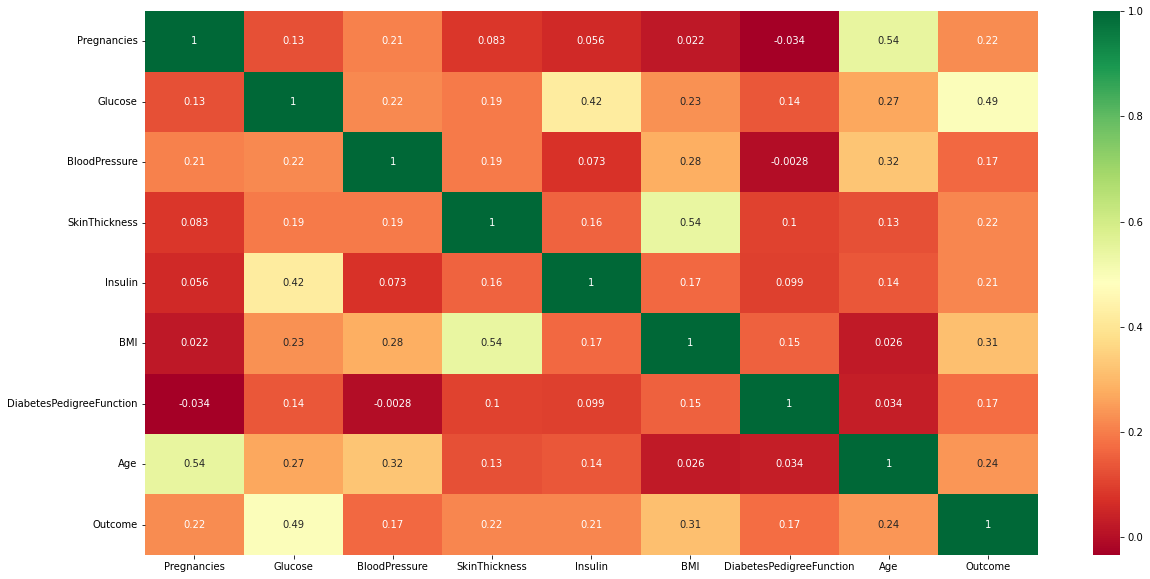

In [15]:
####Visualization##
###Check the coorelation
plt.figure(figsize=(20,10))
p = sns.heatmap(df1_copy.corr(), annot=True,cmap ='RdYlGn')

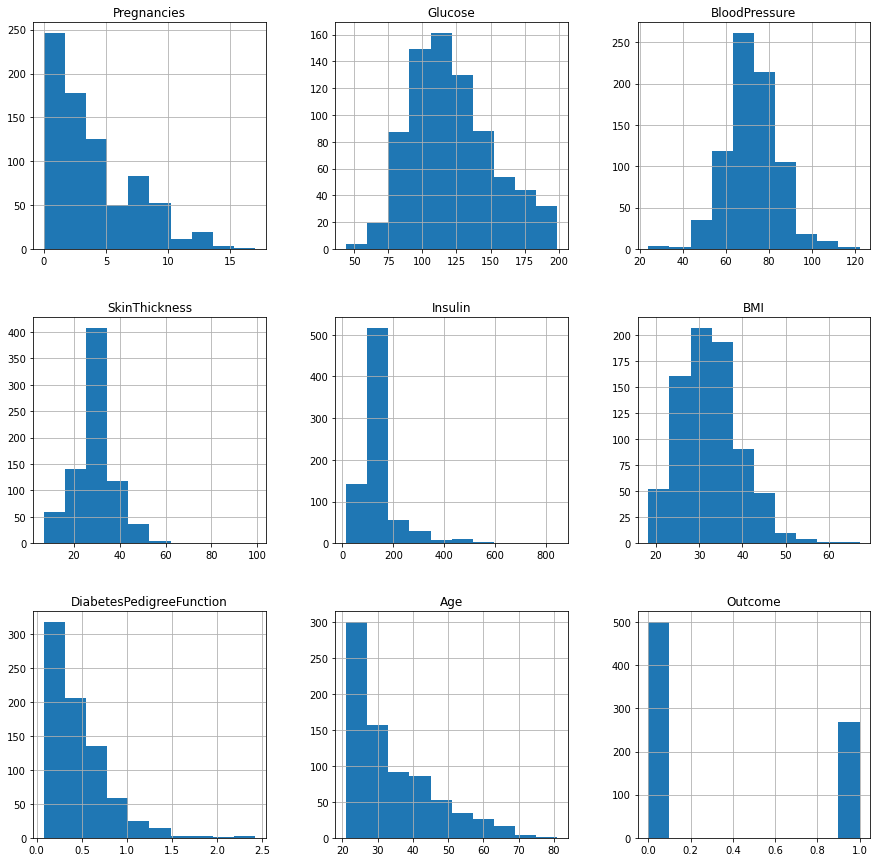

In [16]:
x = df1_copy.hist(figsize = (15,15))

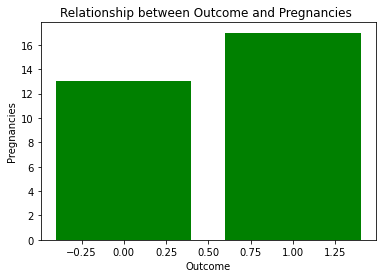

In [17]:
x=df1_copy["Outcome"]
y=df1_copy["Pregnancies"]
plt.bar(x, y, color='g')
plt.title("Relationship between Outcome and Pregnancies ")
plt.xlabel("Outcome")
plt.ylabel("Pregnancies")
plt.show()

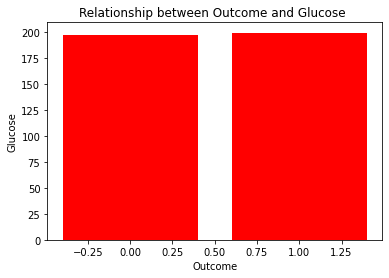

In [18]:
x=df1_copy["Outcome"]
y=df1_copy["Glucose"]
plt.bar(x, y, color='r')
plt.title("Relationship between Outcome and Glucose ")
plt.xlabel("Outcome")
plt.ylabel("Glucose")
plt.show()

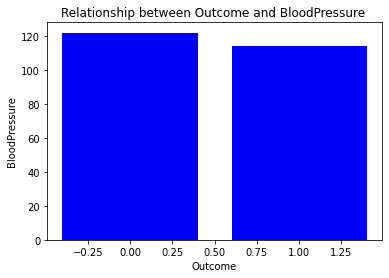

In [19]:
x=df1_copy["Outcome"]
y=df1_copy["BloodPressure"]
plt.bar(x, y, color='b')
plt.title("Relationship between Outcome and BloodPressure ")
plt.xlabel("Outcome")
plt.ylabel("BloodPressure")
plt.show()

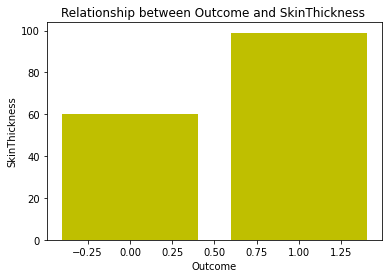

In [20]:
x=df1_copy["Outcome"]
y=df1_copy["SkinThickness"]
plt.bar(x, y, color='y')
plt.title("Relationship between Outcome and SkinThickness ")
plt.xlabel("Outcome")
plt.ylabel("SkinThickness")
plt.show()

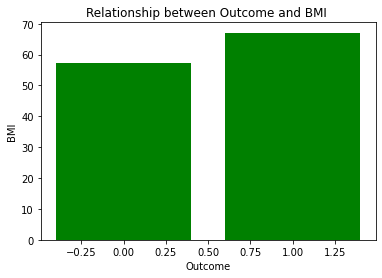

In [21]:
x=df1_copy["Outcome"]
y=df1_copy["BMI"]
plt.bar(x, y, color='g')
plt.title("Relationship between Outcome and BMI ")
plt.xlabel("Outcome")
plt.ylabel("BMI")
plt.show()

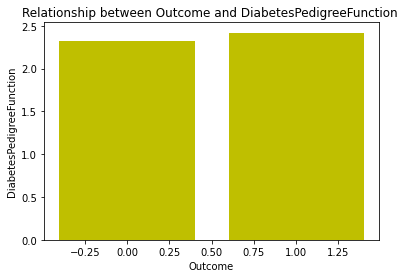

In [22]:
x=df1_copy["Outcome"]
y=df1_copy["DiabetesPedigreeFunction"]
plt.bar(x, y, color='y')
plt.title("Relationship between Outcome and DiabetesPedigreeFunction ")
plt.xlabel("Outcome")
plt.ylabel("DiabetesPedigreeFunction")
plt.show()

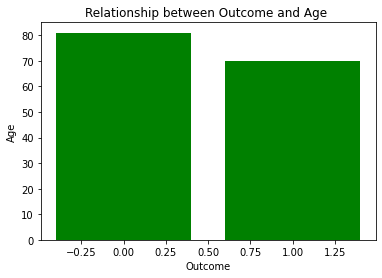

In [23]:
x=df1_copy["Outcome"]
y=df1_copy["Age"]
plt.bar(x, y, color='g')
plt.title("Relationship between Outcome and Age ")
plt.xlabel("Outcome")
plt.ylabel("Age")
plt.show()

In [24]:
X = df1_copy.drop("Outcome",axis=1)
y = df1_copy["Outcome"]

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [30]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [31]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7559055118110236


In [68]:
import pickle
pickle_out = open("rfc2.pkl", "wb") 
pickle.dump(rfc, pickle_out) 
pickle_out.close()

In [33]:
log=LogisticRegression(max_iter=10000)
log.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [34]:
predictions = log.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7559055118110236


In [35]:
svc=LinearSVC(dual=False)
svc.fit(X_train, y_train)

LinearSVC(dual=False)

In [36]:
predictions = svc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7519685039370079


In [37]:
dtr=DecisionTreeClassifier()
dtr.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
predictions = dtr.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7362204724409449


In [39]:
gnb=GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [40]:
predictions = gnb.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7440944881889764


 ## Data Cleaning and preparation for Heart Failture

In [41]:
df3=pd.read_csv('heart.csv')
print(df3.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [43]:
###drop any null row##
df3_copy=df3.dropna()
print(df3_copy)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

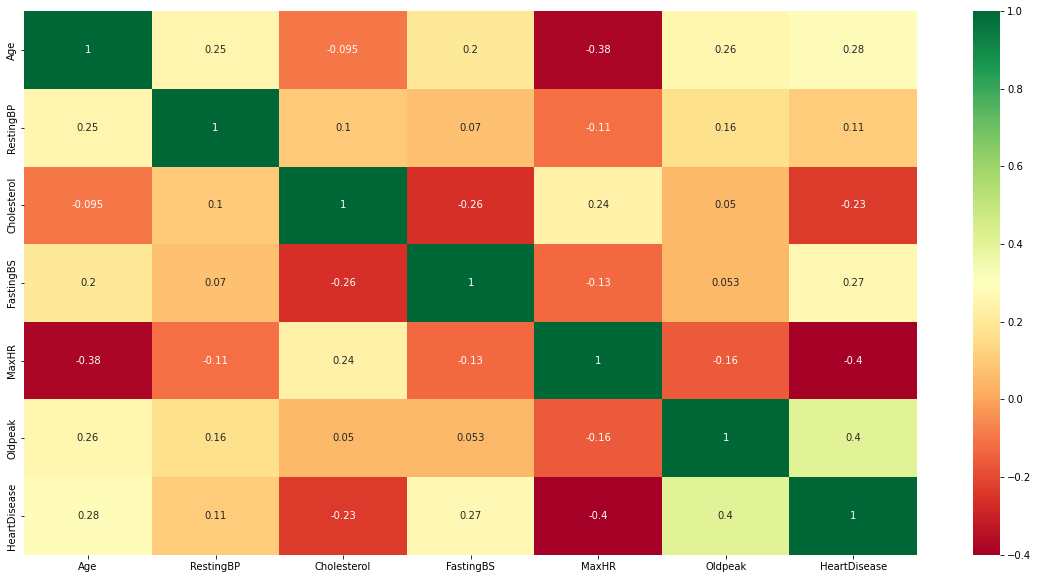

In [44]:
####Visualization##
###Check the coorelation
plt.figure(figsize=(20,10))
p = sns.heatmap(df3_copy.corr(), annot=True,cmap ='RdYlGn')

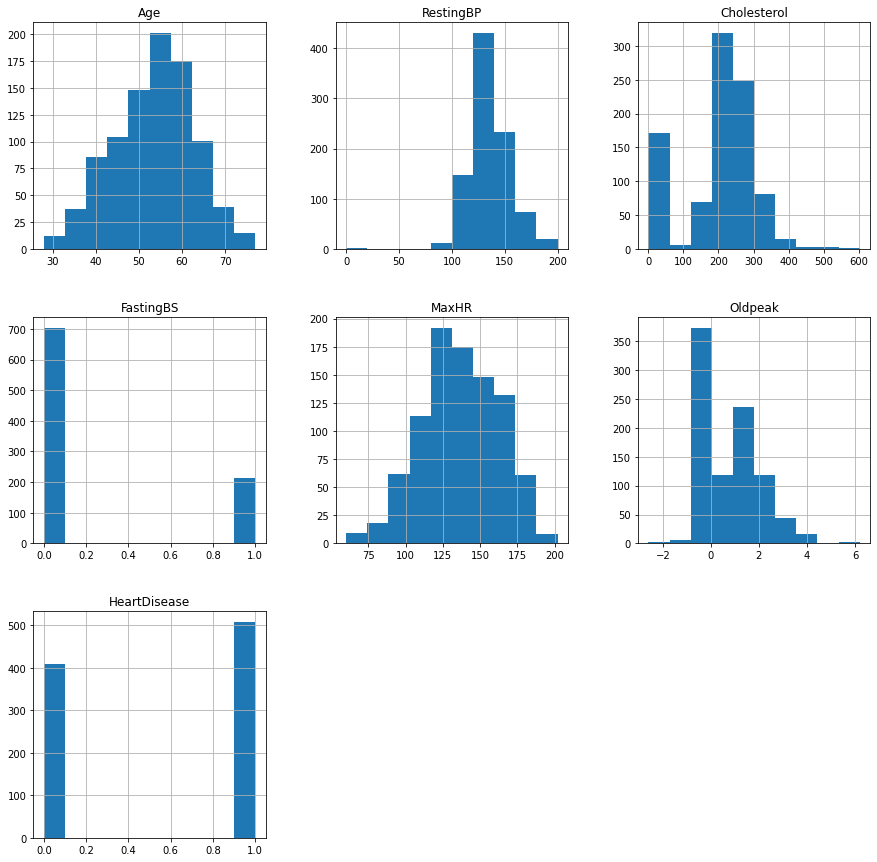

In [45]:
x = df3_copy.hist(figsize = (15,15))

In [46]:
from sklearn import preprocessing
cols=df3_copy.select_dtypes(include=['object']).columns
print(cols)
# This code will find the columns whose data type is object.
le=preprocessing.LabelEncoder()
# Initialize the Label Encoder object
df3_copy[cols]=df3_copy[cols].apply(le.fit_transform)
# Transfering categorical data into numeric
print(df3_copy.head(10))

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   
5   39    1              2        120          339          0           1   
6   45    0              1        130          237          0           1   
7   54    1              1        110          208          0           1   
8   37    1              0        140          207          0           1   
9   48    0              1        120          284          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  


In [47]:
X=df3_copy.drop("HeartDisease",axis=1)
y=df3_copy["HeartDisease"]

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [49]:
rfc1 = RandomForestClassifier(n_estimators=200)
rfc1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [50]:
from sklearn import metrics

predictions = rfc1.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.8745874587458746


In [59]:
pickle_out = open("rfc3.pkl", "wb") 
pickle.dump(rfc1, pickle_out) 
pickle_out.close()

In [60]:
log1=LogisticRegression(max_iter=10000)
log1.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [61]:
predictions = log1.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.8712871287128713


In [62]:
svc1=LinearSVC(dual=False)
svc1.fit(X_train, y_train)

LinearSVC(dual=False)

In [63]:
predictions = svc1.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.8745874587458746


In [64]:
dtr1=DecisionTreeClassifier()
dtr1.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
predictions = dtr1.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.8085808580858086


In [66]:
gnb1=GaussianNB()
gnb1.fit(X_train, y_train)

GaussianNB()

In [67]:
predictions = gnb1.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.8514851485148515
